In [194]:
import pandas as pd
import numpy as np
from scipy import stats  
import matplotlib.pyplot as plt
import japanize_matplotlib
from glob import glob

In [195]:
files = glob("../csv/例題_データアナリティクス基礎/*")
for i, f in enumerate(files):
    print(i, f)


0 ../csv/例題_データアナリティクス基礎\例題10_自由記述データ&形態素解析データ.xlsx
1 ../csv/例題_データアナリティクス基礎\例題11_乱数で発生させた分布の基本統計量.xlsx
2 ../csv/例題_データアナリティクス基礎\例題1_自転車データ.xlsx
3 ../csv/例題_データアナリティクス基礎\例題2_顧客ID付き食品購入データ.xlsx
4 ../csv/例題_データアナリティクス基礎\例題3_テレビ視聴アンケートデータ.xlsx
5 ../csv/例題_データアナリティクス基礎\例題4_5つの地域の事業所数.xlsx
6 ../csv/例題_データアナリティクス基礎\例題5_関東地方の人口データ.xlsx
7 ../csv/例題_データアナリティクス基礎\例題7_異なる授業形態による成績データ.xlsx
8 ../csv/例題_データアナリティクス基礎\例題8_遊園地テーマパーク入場者数.xlsx
9 ../csv/例題_データアナリティクス基礎\例題9_店舗別販売額.xlsx


In [196]:
population_data = pd.read_excel(files[6])
print(population_data.columns)
population_data.columns = ['pref', 'cities', 'class', 'pop', 'area', 'age', 'household', 'ratio']
population_data.head()

Index(['都県名', '市区町村名', '区分', '総人口\n（人）', '面積\n（km2)', '平均年齢\n（歳）',
       '核家族世帯\n（万世帯）', '第３次産業\n就労者の割合\n（％）'],
      dtype='object')


,pref,cities,class,pop,area,age,household,ratio
0,東京都,あきる野市,市,80954,73.467647,46.587797,2.0470,73.317075
1,千葉県,いすみ市,市,38594,157.462260,53.001037,0.8203,66.634627
2,茨城県,かすみがうら市,市,42147,156.622074,47.213030,0.8614,57.537196
3,埼玉県,さいたま市 浦和区,区,154416,11.510011,43.580678,4.0173,82.985686
4,埼玉県,さいたま市 岩槻区,区,109801,49.169764,47.370459,2.7230,70.862069


In [209]:
# 相関係数
correlation_coefficient = population_data.corr(numeric_only=True)
for i in range(1, 6):
    for j in range(i):
        correlation_coefficient.iloc[j, i] = '-'
# correlation_coefficient.iloc[0, 1] = '-'
display(correlation_coefficient)
print(f"核家族世帯と第3次産業の就労割合の相関係数 :{correlation_coefficient.loc['household', 'ratio']}")

,pop,area,age,household,ratio,dencity
pop,1.000000,-,-,-,-,-
area,-0.053318,1.0,-,-,-,-
age,-0.448625,0.278114,1.0,-,-,-
household,0.996342,-0.070386,-0.45062,1.0,-,-
ratio,0.511483,-0.320585,-0.434113,0.524136,1.0,-
dencity,0.630847,-0.351245,-0.513029,0.619234,0.687707,1.0


核家族世帯と第3次産業の就労割合の相関係数 :-


In [198]:
# 人口密度を追加した相関係数
population_data['dencity'] = population_data['pop'] / population_data['area']
population_data.corr(numeric_only=True)

,pop,area,age,household,ratio,dencity
pop,1.000000,-0.053318,-0.448625,0.996342,0.511483,0.630847
area,-0.053318,1.000000,0.278114,-0.070386,-0.320585,-0.351245
age,-0.448625,0.278114,1.000000,-0.450620,-0.434113,-0.513029
household,0.996342,-0.070386,-0.450620,1.000000,0.524136,0.619234
ratio,0.511483,-0.320585,-0.434113,0.524136,1.000000,0.687707
dencity,0.630847,-0.351245,-0.513029,0.619234,0.687707,1.000000


In [199]:
# 回帰分析
import statsmodels.api as sm

cities_data = population_data[population_data['class'] == '市']
x_train = cities_data[['age']]
y_train = cities_data[['ratio']]
x_add_const = sm.add_constant(x_train)
model_sm = sm.OLS(y_train, x_add_const).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  ratio   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     45.67
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           2.05e-10
Time:                        14:33:27   Log-Likelihood:                -610.10
No. Observations:                 175   AIC:                             1224.
Df Residuals:                     173   BIC:                             1231.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        147.5459     11.512     12.816      0.0

切片: 147.55
傾き: -1.67
決定係数: 0.21
予測値数: (175,)


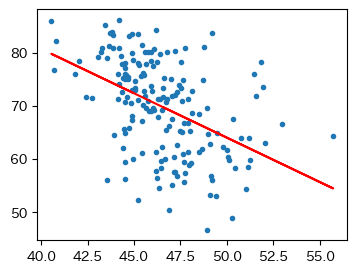

In [200]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
x_train = cities_data[['age']]
y_train = cities_data['ratio']
model_lr.fit(x_train, y_train)
y_pred = model_lr.predict(x_train)
r = model_lr.score(x_train, y_train)
print(f'切片: {model_lr.intercept_:.02f}')
print(f'傾き: {model_lr.coef_[0]:.02f}')
print(f'決定係数: {r:.02f}')
print(f'予測値数: {y_pred.shape}')

plt.figure(figsize=[4, 3])
plt.scatter(x_train, y_train, marker='.')
plt.plot(x_train, y_pred, color = 'red')
plt.show()

In [201]:
# 平均年齢50歳の予測値
x = 50
# print(model_lr.predict([[x]]))
y_hat = model_lr.coef_[0] * x + model_lr.intercept_
print(f'{y_hat:.02f}')

63.99


In [202]:
#  最大残差の市町村
pos = (y_pred - y_train).argmax()
cities_data.iloc[94]

pref                栃木県
cities              真岡市
class                 市
pop               79539
area         167.344835
age           45.227991
household        1.5741
ratio         52.189056
dencity           475.3
Name: 181, dtype: object